# 1. Loading Packages

Developed by: Surya Bhattarai

Date: 20 January 2020

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from random import shuffle # repeated in the task for visibility
from math import floor # repeated in the task for visibility
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm

# 2. Loading Data

In [2]:
import csv

input_data= pd.read_csv("../data/diabetic_data.csv")

In [3]:
input_data.shape

(101766, 50)

In [4]:
pd.set_option('display.max_columns', 55)

In [5]:
def outcome(row):
    if row['readmitted'] == "NO":
        val = 0
    else:
        val = 1
    return val

In [6]:
input_data['readmitted'] = input_data.apply(outcome, axis=1)
#input_data['admission'] = 1
input_data.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0


In [7]:
input_data = input_data.replace('?', np.nan)
input_data['race'] = input_data['race'].fillna('Unidentified')
input_data['diag_3'] = input_data['diag_3'].fillna('3NE')
input_data['diag_2'] = input_data['diag_2'].fillna('2NE')
input_data['diag_1'] = input_data['diag_1'].fillna('1NE')
input_data['gender'] = input_data['gender'].str.replace('Unknown/Invalid','Male')

In [17]:
#input_data = input_data[['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures','num_medications', 'number_outpatient', 'number_emergency','number_inpatient', 'diag_1','diag_2','diag_3','number_diagnoses','readmitted','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide']]
#input_data 

In [18]:
input_data.isnull().sum().sum()

188774

In [19]:
input_data.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,2NE,3NE,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0


# 3. Preparing the train and test files

In [21]:
from sklearn.model_selection import train_test_split
data_train, data_test= train_test_split(input_data, test_size=0.20, random_state=31)

## 4. EDA

In [22]:
print('train: ', data_train.shape)
print('test: ', data_test.shape)

train:  (81412, 50)
test:  (20354, 50)


In [23]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81412 entries, 45948 to 53970
Data columns (total 50 columns):
encounter_id                81412 non-null int64
patient_nbr                 81412 non-null int64
race                        81412 non-null object
gender                      81412 non-null object
age                         81412 non-null object
weight                      2521 non-null object
admission_type_id           81412 non-null int64
discharge_disposition_id    81412 non-null int64
admission_source_id         81412 non-null int64
time_in_hospital            81412 non-null int64
payer_code                  49278 non-null object
medical_specialty           41529 non-null object
num_lab_procedures          81412 non-null int64
num_procedures              81412 non-null int64
num_medications             81412 non-null int64
number_outpatient           81412 non-null int64
number_emergency            81412 non-null int64
number_inpatient            81412 non-null int64


In [24]:
# Identifying null values
data_train.isnull().sum(axis = 0)

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      78891
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  32134
medical_specialty           39883
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

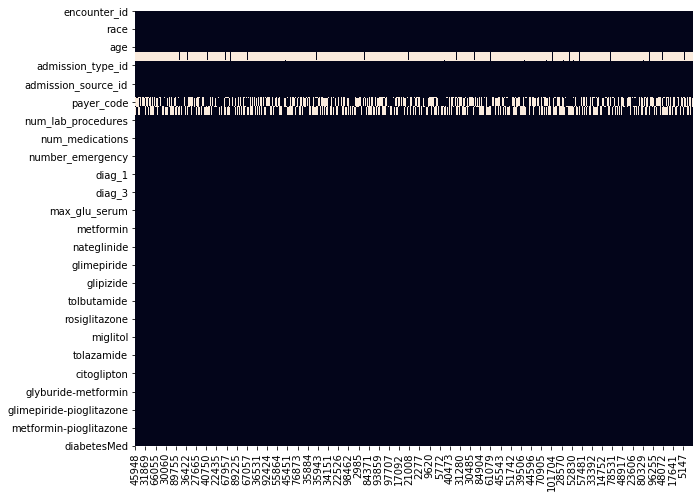

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(data_train.isnull().T, cbar=False);

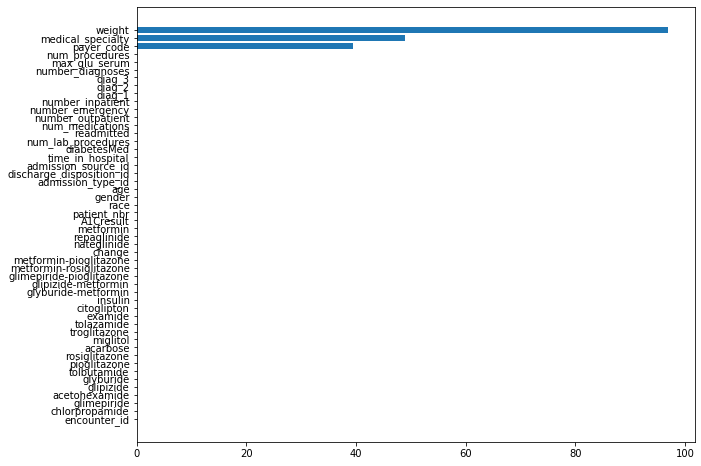

In [25]:
plt.figure(figsize=(10,8))
missing = pd.DataFrame({'column':data_train.columns ,'na_percent':data_train.isnull().sum()/len(data_train)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'],width=missing['na_percent']);

In [26]:
cat = len(data_train.select_dtypes(include=['object']).columns)
num = len(data_train.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  36 categorical + 14 numerical = 50 features


In [15]:
data_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
encounter_id,81412.0,1.652221e+08,1.025615e+08,16680.0,85155550.5,152462745.0,2.302438e+08,443867222.0
patient_nbr,81412.0,5.443734e+07,3.871866e+07,135.0,23427670.5,45577642.5,8.772805e+07,189502619.0
admission_type_id,81412.0,2.022970e+00,1.445174e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,81412.0,3.705965e+00,5.278819e+00,1.0,1.0,1.0,3.000000e+00,28.0
admission_source_id,81412.0,5.751928e+00,4.062328e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,81412.0,4.387609e+00,2.982621e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,81412.0,4.306487e+01,1.969650e+01,1.0,31.0,44.0,5.700000e+01,129.0
num_procedures,81412.0,1.341080e+00,1.705933e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,81412.0,1.601327e+01,8.144151e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,81412.0,3.718494e-01,1.275473e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [16]:
data_train = data_train.drop(['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'weight', 'payer_code', 'medical_specialty'], axis=1)
data_test = data_test.drop(['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'weight', 'payer_code', 'medical_specialty'], axis=1)

In [63]:
data_train.head(5)

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
45948,Caucasian,Female,[80-90),3,30,0,10,0,0,0,428,473,401,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
27795,AfricanAmerican,Female,[50-60),6,69,3,17,0,0,0,425,428,424,5,None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0
33289,Hispanic,Female,[70-80),5,17,1,11,5,0,0,174,428,496,9,Norm,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,0
96753,Caucasian,Male,[40-50),3,2,0,19,1,0,1,250.82,730,731,9,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
16337,Caucasian,Female,[80-90),6,80,0,10,0,1,0,250.8,276,396,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1


In [18]:
summary = data_train.groupby(['race', 'gender', 'age'], as_index=False).agg({'time_in_hospital': 'sum', 'num_lab_procedures': 'sum', 'num_procedures': 'sum', 'num_medications': 'sum', 'number_outpatient': 'sum', 'number_emergency': 'sum', 'number_inpatient': 'sum', 'readmitted': 'sum'})
summary.head(5)

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,readmitted
0,AfricanAmerican,Female,[0-10),21,306,1,45,0,0,0,3
1,AfricanAmerican,Female,[10-20),340,4882,29,867,14,24,67,48
2,AfricanAmerican,Female,[20-30),1120,12249,234,3613,154,199,350,135
3,AfricanAmerican,Female,[30-40),2524,27568,702,9022,181,220,490,262
4,AfricanAmerican,Female,[40-50),5518,54881,1408,19868,400,511,1141,572


In [19]:
summary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,115.0,3106.121739,7573.149462,1.0,76.5,348.0,1034.5,40685.0
num_lab_procedures,115.0,30486.930435,72379.066263,31.0,947.5,3805.0,11467.5,377402.0
num_procedures,115.0,949.391304,2425.618752,0.0,11.5,104.0,320.0,12350.0
num_medications,115.0,11336.278261,28098.331823,7.0,270.5,1137.0,3736.5,146292.0
number_outpatient,115.0,263.243478,721.709770,0.0,3.0,20.0,89.5,3984.0
number_emergency,115.0,138.565217,281.372673,0.0,1.0,10.0,73.0,1177.0
number_inpatient,115.0,449.756522,1042.026430,0.0,4.5,38.0,203.5,5233.0
readmitted,115.0,326.478261,806.575644,0.0,6.0,31.0,107.5,4249.0


In [20]:
#Create function for ECDF
def ecdf(data):
    xaxis=np.sort(data)#sort the data
    yaxis=np.arange(1,len(data)+1)/len(data)#create percentages for y axis from 1% to 100%
    return xaxis, yaxis

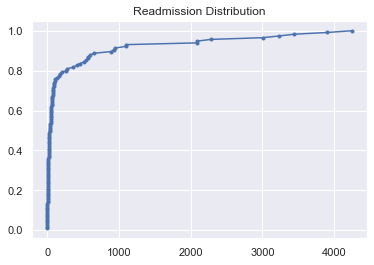

In [21]:
# Empirical cumulative distribution function (ECDF)

sns.set()
x = np.sort(summary['readmitted'])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.')
_ = plt.title('Readmission Distribution')
#_ = plt.xlabel('x label')
#_ = plt.ylabel('y label')

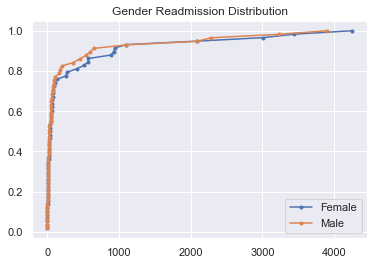

In [22]:
genders=sorted(summary['gender'].unique().tolist())

for gender in genders:
    xs,ys=ecdf(summary['readmitted'][summary['gender']==gender])
    plt.plot(xs,ys, marker='.')
    
#Plot the ECDFs
plt.title('Gender Readmission Distribution')
plt.legend(genders)
plt.show()

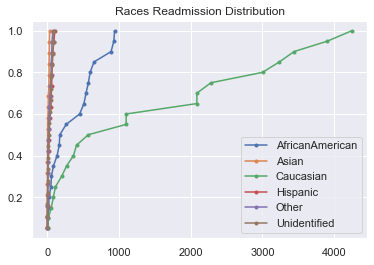

In [23]:
races=sorted(summary['race'].unique().tolist())

for race in races:
    xs,ys=ecdf(summary['readmitted'][summary['race']==race])
    plt.plot(xs,ys, marker='.')
    
#Plot the ECDFs
plt.title('Races Readmission Distribution')
plt.legend(races)
plt.show()

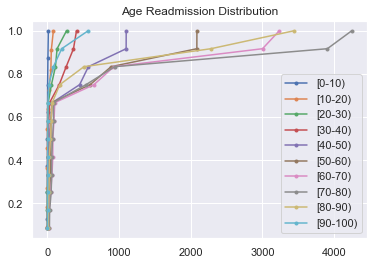

In [24]:
ages=sorted(summary['age'].unique().tolist())

for age in ages:
    xs,ys=ecdf(summary['readmitted'][summary['age']==age])
    plt.plot(xs,ys, marker='.')
    
#Plot the ECDFs
plt.title('Age Readmission Distribution')
plt.legend(ages)
plt.show()

In [25]:
#Group by 
#gender_std = pd.DataFrame(data_train.groupby(['gender'])[['readmitted']].sum())
#gender_std

In [26]:
#data_train.isnull().sum(axis = 0)

count    81412.000000
mean         0.461173
std          0.498493
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: readmitted, dtype: float64


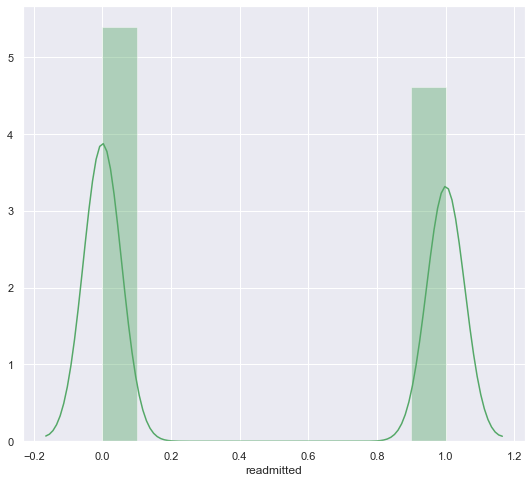

In [27]:
# Readmitted distribution

print(data_train['readmitted'].describe())
plt.figure(figsize=(9,8))
sns.distplot(data_train['readmitted'], color='g', bins=10, hist_kws={'alpha': 0.4})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a216ee668>,
      dtype=object)

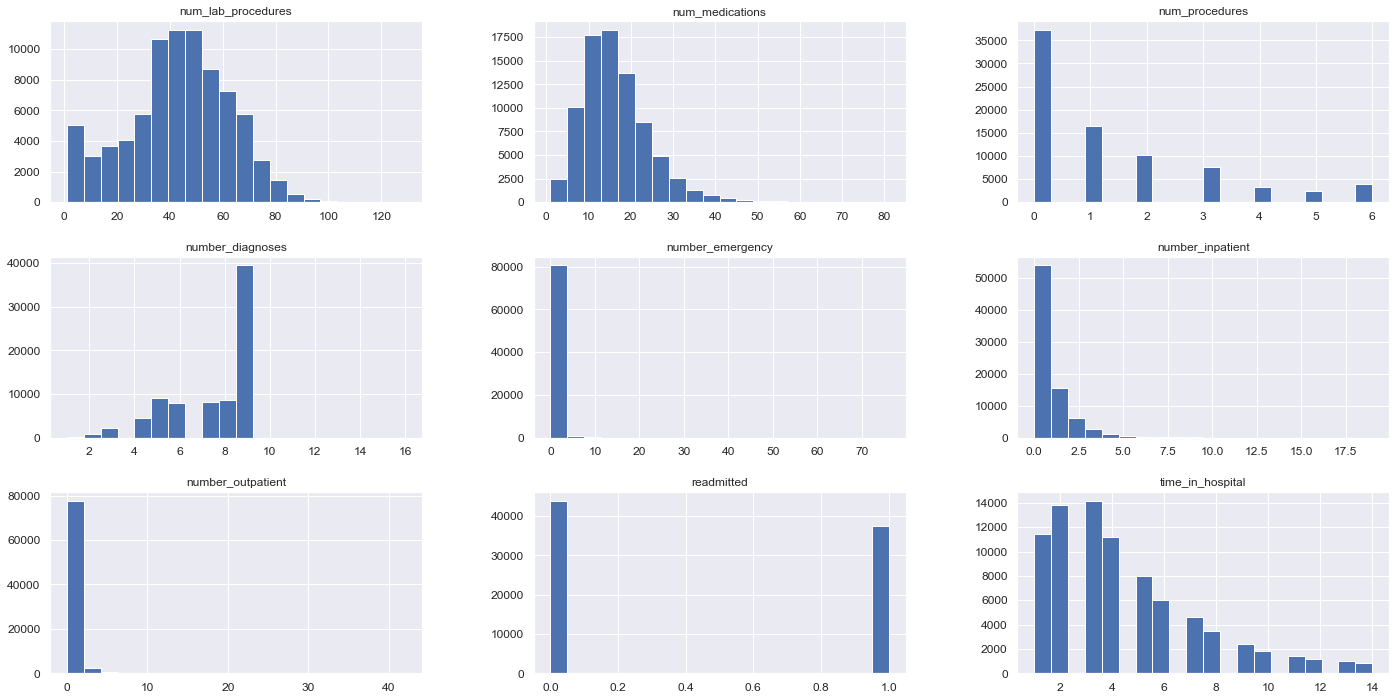

In [28]:
data_train.hist(figsize=(24, 12), bins=20, xlabelsize=12, ylabelsize=12)

In [29]:
#cols = list(data_train.columns.values)
#data_train = data_train[cols[0:41] + [cols[-1]] + [cols[41]]]
#data_train.head(5)


 mu = 0.46 and sigma = 0.50



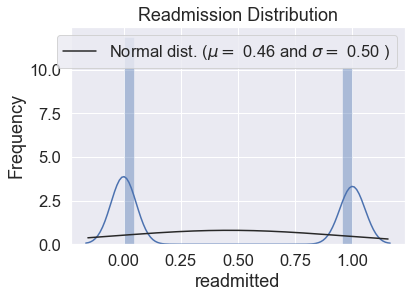

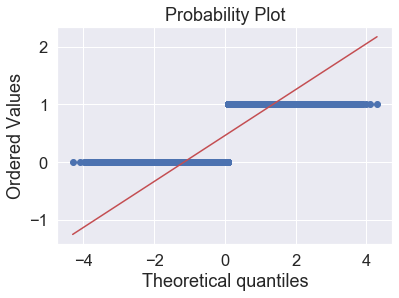

Skewness: 0.155782
Kurtosis: -1.975780


In [67]:
# Plot Histogram
from scipy import stats
from scipy.stats import norm
sns.distplot(data_train['readmitted'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data_train['readmitted'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Readmission Distribution')

fig = plt.figure()
res = stats.probplot(data_train['readmitted'], plot=plt)
plt.show()

print("Skewness: %f" % data_train['readmitted'].skew())
print("Kurtosis: %f" % data_train['readmitted'].kurt())


 mu = 2.72 and sigma = 0.49



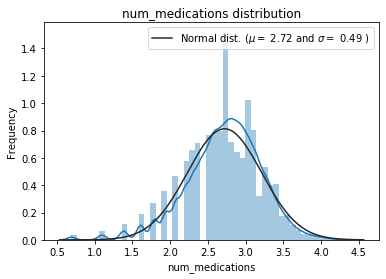

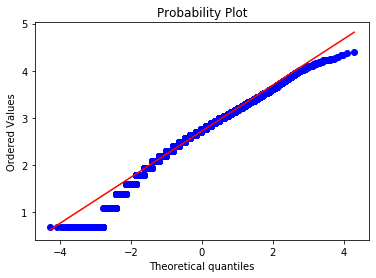

NameError: name 'kurtosis' is not defined

In [28]:
df1 =data_train.copy()
df1['num_medications'] = np.log1p(data_train['num_medications'])
sns.distplot(df1['num_medications'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df1['num_medications'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('num_medications distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['num_medications'], plot=plt)
plt.show()
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(df1['num_medications']) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(df1['num_medications']) ))

In [65]:
input_data.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,2NE,3NE,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0



 mu = 43.06 and sigma = 19.70



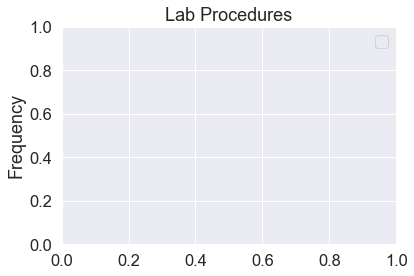

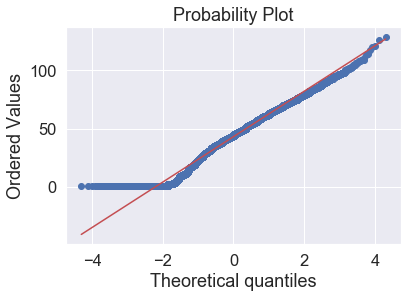

Skewness: -0.236318
Kurtosis: -0.248679


In [68]:
# Plot Histogram
from scipy import stats
from scipy.stats import norm
sns.distplot(data_train['readmitted'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data_train['readmitted'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Readmission Distribution')

fig = plt.figure()
res = stats.probplot(data_train['readmitted'], plot=plt)
plt.show()

print("Skewness: %f" % data_train['readmitted'].skew())
print("Kurtosis: %f" % data_train['readmitted'].kurt())

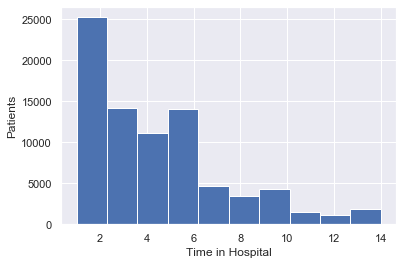

In [31]:
bins=10

sns.set()
_ = plt.hist(data_train['time_in_hospital'], bins=bins)
_ = plt.xlabel('Time in Hospital')
_ = plt.ylabel('Patients')
plt.show()

# 4. Analysing the readmitted variable

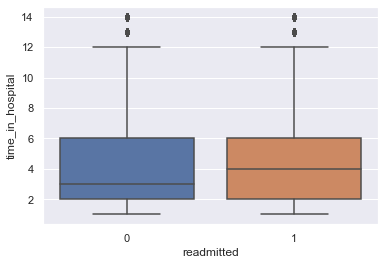

In [32]:
sns.boxplot(x=data_train['readmitted'], y=data_train['time_in_hospital'])

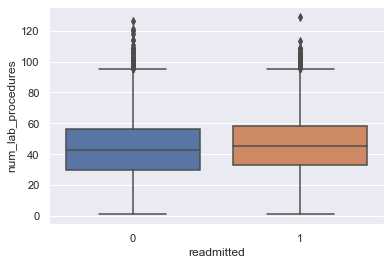

In [33]:
sns.boxplot(x=data_train['readmitted'], y=data_train['num_lab_procedures'])

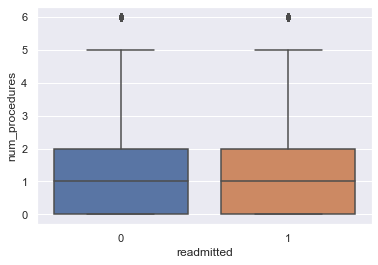

In [34]:
sns.boxplot(x=data_train['readmitted'], y=data_train['num_procedures'])

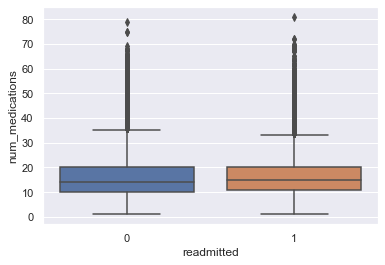

In [35]:
sns.boxplot(x=data_train['readmitted'], y=data_train['num_medications'])

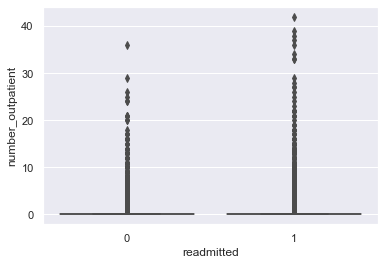

In [36]:
sns.boxplot(x=data_train['readmitted'], y=data_train['number_outpatient'])

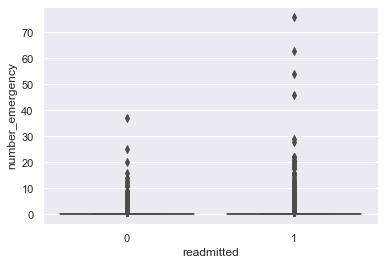

In [37]:
sns.boxplot(x=data_train['readmitted'], y=data_train['number_emergency'])

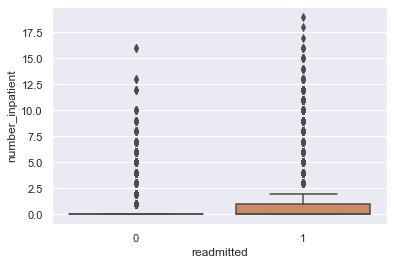

In [38]:
sns.boxplot(x=data_train['readmitted'], y=data_train['number_inpatient'])

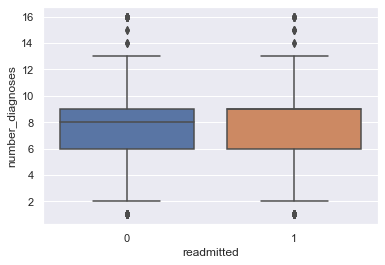

In [39]:
sns.boxplot(x=data_train['readmitted'], y=data_train['number_diagnoses'])

In [40]:
data_train.head(5)

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
45948,Caucasian,Female,[80-90),3,30,0,10,0,0,0,428,473,401,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
27795,AfricanAmerican,Female,[50-60),6,69,3,17,0,0,0,425,428,424,5,None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0
33289,Hispanic,Female,[70-80),5,17,1,11,5,0,0,174,428,496,9,Norm,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,0
96753,Caucasian,Male,[40-50),3,2,0,19,1,0,1,250.82,730,731,9,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
16337,Caucasian,Female,[80-90),6,80,0,10,0,1,0,250.8,276,396,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1


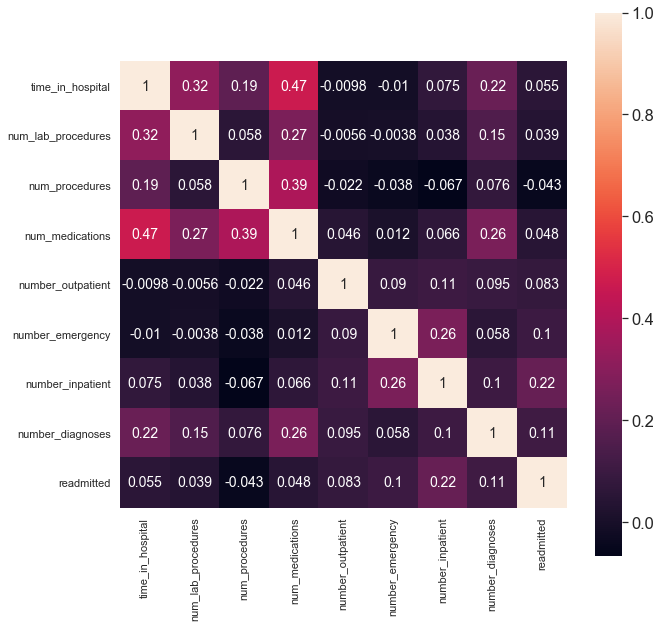

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(data_train.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 14})
plt.show()

In [42]:
# Most correlated features

cols = list(data_train.columns.values)
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
cols

['race',
 'gender',
 'age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [43]:
### seprate features from outcome
X_TRAIN = data_train.drop('readmitted',axis = 1)
X_TEST= data_test.drop('readmitted',axis = 1)

In [44]:
y_TRAIN = data_train['readmitted']
y_TEST = data_test['readmitted']

y_TEST.head()

48165    1
72789    1
37056    0
98338    1
9756     0
Name: readmitted, dtype: int64

In [45]:
print('X_TRAIN: ', X_TRAIN.shape)
print('X_TEST: ', X_TEST.shape)
print('y_TRAIN: ', y_TRAIN.shape)
print('y_TEST: ', y_TEST.shape)

X_TRAIN:  (81412, 41)
X_TEST:  (20354, 41)
y_TRAIN:  (81412,)
y_TEST:  (20354,)


In [46]:
y_TRAIN.head(5)

45948    0
27795    0
33289    0
96753    0
16337    1
Name: readmitted, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder

new_model = LabelEncoder()

x_tr = pd.DataFrame(X_TRAIN.apply(LabelEncoder().fit_transform))
x_te = pd.DataFrame(X_TEST.apply(LabelEncoder().fit_transform))

y_tr = pd.DataFrame(new_model.fit_transform(y_TRAIN))
y_te = pd.DataFrame(new_model.fit_transform(y_TEST))

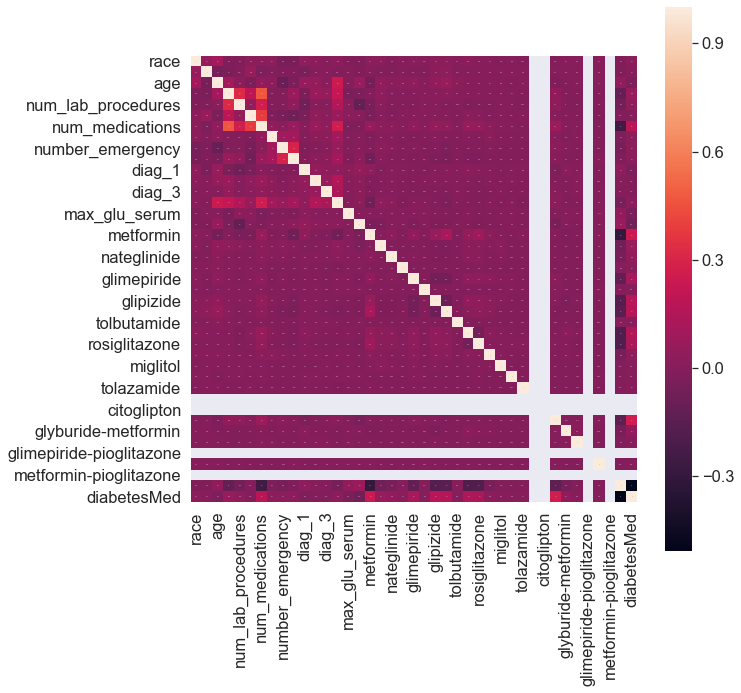

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(x_tr.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 1})
plt.show()

In [49]:
x_train_list = pd.DataFrame(list(x_tr))
x_test_list = pd.DataFrame(list(x_te))

new_list = set(x_train_list).difference(x_test_list)

In [50]:
data_train.head(5)

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
45948,Caucasian,Female,[80-90),3,30,0,10,0,0,0,428,473,401,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
27795,AfricanAmerican,Female,[50-60),6,69,3,17,0,0,0,425,428,424,5,None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0
33289,Hispanic,Female,[70-80),5,17,1,11,5,0,0,174,428,496,9,Norm,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,0
96753,Caucasian,Male,[40-50),3,2,0,19,1,0,1,250.82,730,731,9,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
16337,Caucasian,Female,[80-90),6,80,0,10,0,1,0,250.8,276,396,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1


# Define a model

In [51]:
from sklearn.linear_model import LinearRegression,LogisticRegression
My_model = LogisticRegression(tol=0.00001,penalty ='l2')

In [52]:
# train a model
My_model.fit(x_tr,y_tr)

/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=1e-05, verbose=0,
                   warm_start=False)

In [53]:
#predict the model
y_pred = My_model.predict(x_te)

In [54]:
#measure the score
My_model.score(x_te, y_te)

0.602879040974747

In [ ]:
# fix the distribution of data
# calculate recall
# calculate precision
# fix skewness
# Fix imbalance data (imbalanced-learn library) - try
# every rule, find/replace on training data, must be applied to test data but with training values/formulas.


In [55]:
# Use Forward Feature Selection to pick a good model

from sklearn.linear_model import LinearRegression, LogisticRegression
My_model = LogisticRegression()

all_columns = list([c for c in x_tr.columns if c != 'readmitted'])

# start with no predictors
included = []

predictor_columns = list(set(all_columns) - set(included))

for new in predictor_columns:

    # Ammends the included list with a new one
    included.append(new)
    
    # selecting the specific columns from training data
    x_tr_2 = x_tr[included]
    
    # selecting the specific columns from test data
    x_te_2 = x_te[included]
    
    # counting the number of features
    no_of_features = len(included)

    # fit the model with the Training data
    fit = My_model.fit(x_tr_2, y_tr) # fit a model; consider which predictors should be included
    
    # predict the model
    y_pred = My_model.predict(x_te_2)
    
    # calculate the score (R^2 for Regression)
    r2 = My_model.score(x_tr_2, y_tr) # calculate the score
    
    # Calculate the score (R^2 for Regression) for Testing Data
    r2_te = My_model.score(x_te_2, y_te)
        
    print(no_of_features, ' Features. Train Model accuracy: ', r2, ' Test Model accuracy: ', r2_te)

/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

1  Features. Train Model accuracy:  0.5388271999213875  Test Model accuracy:  0.5402869214896335
2  Features. Train Model accuracy:  0.5325382007566453  Test Model accuracy:  0.5311977989584357
3  Features. Train Model accuracy:  0.5330049624134034  Test Model accuracy:  0.5314434509187383


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

4  Features. Train Model accuracy:  0.5330909448238589  Test Model accuracy:  0.5313943205266778
5  Features. Train Model accuracy:  0.5343438313762099  Test Model accuracy:  0.5362582293406701


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

6  Features. Train Model accuracy:  0.5347000442195253  Test Model accuracy:  0.5359143165962464
7  Features. Train Model accuracy:  0.5345526458016018  Test Model accuracy:  0.5358160558121254


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8  Features. Train Model accuracy:  0.5345649290030954  Test Model accuracy:  0.5368477940453965


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9  Features. Train Model accuracy:  0.5482115658625264  Test Model accuracy:  0.5434312665815073


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10  Features. Train Model accuracy:  0.5481133002505774  Test Model accuracy:  0.5404834430578757


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11  Features. Train Model accuracy:  0.5480027514371346  Test Model accuracy:  0.5255969342635354


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12  Features. Train Model accuracy:  0.548666044317791  Test Model accuracy:  0.5407290950181782


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13  Features. Train Model accuracy:  0.5556306195646833  Test Model accuracy:  0.5551242998919131


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14  Features. Train Model accuracy:  0.5560605316169607  Test Model accuracy:  0.5511447381350103


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15  Features. Train Model accuracy:  0.5555692035572152  Test Model accuracy:  0.547312567554289


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


16  Features. Train Model accuracy:  0.5559008499975434  Test Model accuracy:  0.553994300874521


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


17  Features. Train Model accuracy:  0.5555814867587088  Test Model accuracy:  0.547312567554289


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


18  Features. Train Model accuracy:  0.5556551859676706  Test Model accuracy:  0.5511447381350103


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


19  Features. Train Model accuracy:  0.5554340883407851  Test Model accuracy:  0.547312567554289


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20  Features. Train Model accuracy:  0.5563430452513143  Test Model accuracy:  0.5456421342242311


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


21  Features. Train Model accuracy:  0.55980690807252  Test Model accuracy:  0.541269529330844


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


22  Features. Train Model accuracy:  0.5597823416695328  Test Model accuracy:  0.541269529330844


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


23  Features. Train Model accuracy:  0.6112243895248858  Test Model accuracy:  0.5979168713766336


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


24  Features. Train Model accuracy:  0.6112858055323539  Test Model accuracy:  0.5979168713766336


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


25  Features. Train Model accuracy:  0.6111261239129366  Test Model accuracy:  0.6117225115456422


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


26  Features. Train Model accuracy:  0.6114577703532649  Test Model accuracy:  0.5972781762798467


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


27  Features. Train Model accuracy:  0.6112489559278731  Test Model accuracy:  0.6058268644983787


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


28  Features. Train Model accuracy:  0.6114946199577458  Test Model accuracy:  0.5932003537388228


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


29  Features. Train Model accuracy:  0.6116174519726821  Test Model accuracy:  0.6048933870492287


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30  Features. Train Model accuracy:  0.6116051687711885  Test Model accuracy:  0.6041073007762602


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


31  Features. Train Model accuracy:  0.6116051687711885  Test Model accuracy:  0.5932003537388228


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


32  Features. Train Model accuracy:  0.6117280007861249  Test Model accuracy:  0.5958042645180308


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


33  Features. Train Model accuracy:  0.6163464845477326  Test Model accuracy:  0.6099046870394026


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


34  Features. Train Model accuracy:  0.6166781309880607  Test Model accuracy:  0.6075464282204972


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


35  Features. Train Model accuracy:  0.6187171424360045  Test Model accuracy:  0.6013068684288101


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


36  Features. Train Model accuracy:  0.6185820272195746  Test Model accuracy:  0.6165864203596345


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


37  Features. Train Model accuracy:  0.6180169999508672  Test Model accuracy:  0.6150633782057581


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


38  Features. Train Model accuracy:  0.6178450351299563  Test Model accuracy:  0.6156529429104844


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


39  Features. Train Model accuracy:  0.6174519726821599  Test Model accuracy:  0.6103959909600079


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


40  Features. Train Model accuracy:  0.6173659902717045  Test Model accuracy:  0.6076446890046182


/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/suryabhattarai/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


41  Features. Train Model accuracy:  0.6177590527195008  Test Model accuracy:  0.6156038125184239


In [56]:
## Use Forward Feature Selection to pick a good model
from sklearn.linear_model import LinearRegression, LogisticRegression

# start with no predictors
included = []

# Take all columns except target as predictor columns
predictor_columns = [c for c in x_tr.columns if c != 'readmitted']

# Load the dataset as a pandas data frame
X = pd.DataFrame(x_tr, columns = predictor_columns)

# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}

# create a model object to hold the modelling parameters
model = ___ 

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

# create a model for Linear Regression
My_model = LinearRegression()

# get the number of cases in the test data
n = x_te.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
        for new_column in excluded:
            i = included + [new_column]
            X_train2 = x_tr[i]
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = My_model.fit(X_train2, y_tr) # fit a model; consider which predictors should be included
        
        # calculate the score (R^2 for Regression)
        r2 = My_model.score(X_train2, y_tr) # calculate the score
        
        # number of predictors in this model
        k = len(included) + 1
        
        # calculate the adjusted R^2
        adjusted_r2 = My_model.score(X_train2, y_tr) # calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = metformin-rosiglitazone, num_medications, rosiglitazone, glipizide-metformin, gender, diag_1, acarbose, chlorpropamide, number_diagnoses, age, diag_2, miglitol, num_procedures, glimepiride, diag_3, tolazamide, citoglipton, glipizide, glyburide, pioglitazone, diabetesMed, A1Cresult, number_inpatient, acetohexamide, repaglinide, glyburide-metformin, max_glu_serum, race, tolbutamide, glimepiride-pioglitazone, examide, metformin-pioglitazone, number_emergency, num_lab_procedures, number_outpatient, nateglinide, time_in_hospital, change, insulin, troglitazone, metformin
(Step) Trying metformin...
(Step) - Features = metformin
(Step) - Adjusted R^2: This = 0.001; Best = 0.000
(Step) - New Best!   : Feature = metformin; R^2 = 0.001; Adjusted R^2 = 0.001
Added feature metformin with R^2 = 0.001 and adjusted R^2 = 0.001

(Step) Excluded = metformin-rosiglitazone, num_medications, rosiglitazone, glipizide-metformin, gender, diag_1, acarbose, chlorpropamide, number_diagnoses, a